# Introduction

**Python** is one of the most used programming languages more for machine learning and deep learning. These are some reasons why python is used for machine learning:

* Python is a simple and consistent programming language
* It contains a variety of libraries and frameworks
* Can be performed practically on any platform.

In order to benefit from the flexible possibilities offered by the Python programming language, there are a set of libraries which are mostly used:

* Scikitlearn
* Numpy
* Pandas
* Matplotlib

The notebook contains 1 exercise in total:

* [Exercise 1](#ex_1)


# 1. Get started with Sklearn

**Scikit-learn** is one of the most useful libraries for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

We will be presenting different functions and possibilities that you can use with sklearn from python.

First step is to implement the package into the workplace.

In [2]:
#import scikit-learn
import sklearn
#Importing pandas, numpy, and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Importing all preexisting datasets provided by sklearn
from sklearn import datasets
#From the "ensemble" models of sklearn we import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter("ignore")

# 2. Case study

In order to understand and get used with  sklearn, it is better working with an application. In this notebook, we will be using the wine dataset.

# 3. Load the dataset you want:

In [3]:
#From sklearn dataset we specify which of these datasets we are using
data= datasets.load_wine()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


Note: If you want to discover the list of datasets offered by sklearn you can check the references section for more infos.

Note: You can also upload your own dataset using pandas, as described in the links in the references section.





# 4. Data exploration

In [ ]:
#This function is a full description "package" it gives all infos you can need to know about your data
print(data.DESCR)

In [ ]:
#Defining the loaded dataset as a dataframe (dataframe: 2-dimensional labeled data structure with columns of potentially different types)
df = pd.DataFrame(data.data, columns=data.feature_names)
#Specifying the target is this dataset
df['target'] = data.target
#Displaying the first 5 lines of the dataset using head() function (5 is a default value)
df.head()

In [ ]:
#Almost like DESCR function it gives infos about the variables types and number of null values.
df.info()

In [7]:
#This function enables to split the dataset into a training and testing sets.
from sklearn.model_selection import train_test_split
#iloc is one of the features of dataframe by pandas, Purely integer-location based indexing for selection by position.
#In below code we are specifying the target variable (y) and features (X)
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
#Displaying the length of the X_test and X_train
len(X_test), len(X_train)

(54, 124)

In [ ]:
#Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
 #the fit_transform function fits to data, then transforms it
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_norm[0]

In [ ]:
#Displaying the first raw of X_test after normalization
X_test_norm[0]

In [11]:
# "Standardize" features by removing the mean and "scaling" to unit variance.
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
X_train_std[0]

In [ ]:
xx = np.arange(len(X_train_std))
yy1 = X_train_norm[:,1]
yy2 = X_train_std[:,1]
#PLot normalised data and standardized data.
plt.scatter(xx, yy1, color='g')
plt.scatter(xx, yy2, color='y')

# 5. Training the model

In [16]:
#importing prebuild logistic regression model
from sklearn.linear_model import LogisticRegression
#importing all preprocessing functions offered by sklearn
from sklearn import preprocessing
#contains many utilities : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.utils
from sklearn import utils

In [ ]:
#Defining the penalty or loss function as Ridge Regression (l2)
LogisticRegression(penalty='l2')

 1) malic_acid                     0.091255
 2) ash                            0.088689
 3) alcalinity_of_ash              0.088338
 4) magnesium                      0.084768
 5) total_phenols                  0.084368
 6) flavanoids                     0.083987
 7) nonflavanoid_phenols           0.081690
 8) proanthocyanins                0.079783
 9) color_intensity                0.079220
10) hue                            0.077335
11) od280/od315_of_diluted_wines   0.077285
12) proline                        0.069214
13) target                         0.014067


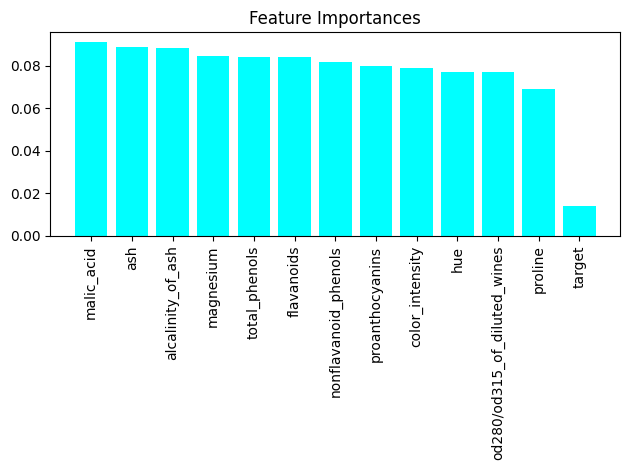

In [18]:
#Encoding the labels (encoding is techniques to transform categorical values to numerical)
lab_enc = preprocessing.LabelEncoder()
encoded1 = lab_enc.fit_transform(y_train)
encoded2=lab_enc.fit_transform(y_test)
#Specifying which colomns contain the labels of the features
feat_labels = df.columns[1:]
#Defining the classifier
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, encoded1)
#Defining/calculating and plotting the importance of features (reflects at which point does a feature impact the output of the classifier)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices],
                     color='cyan', align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()



In [19]:
logi_regr = LogisticRegression(penalty='l2', C=0.1)
logi_regr.fit(X_train_std, encoded1)
print('Training accuracy:', logi_regr.score(X_train_std, encoded1))
print('Test accuracy:', logi_regr.score(X_test_std, encoded2))

Training accuracy: 0.1774193548387097
Test accuracy: 0.018518518518518517


In [ ]:
logi_regr.intercept_

In [ ]:
logi_regr.coef_

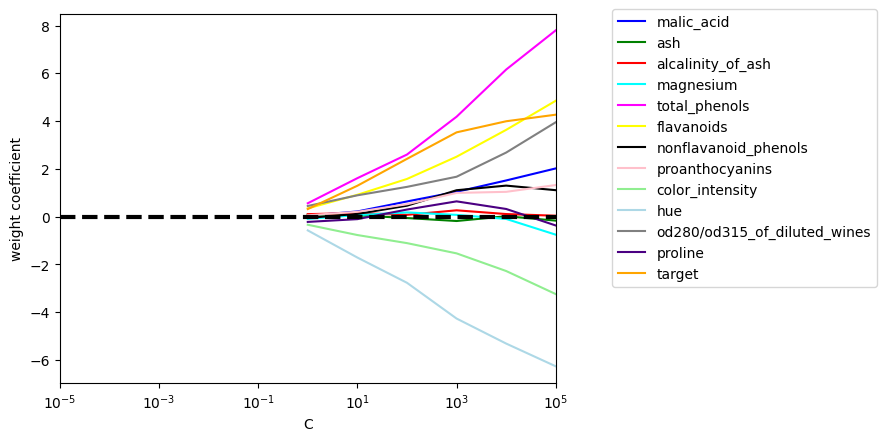

In [31]:
#Plotting the evolution of the classifier's weights :
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(0, 6):
    lr = LogisticRegression(penalty='l2',C=10**c, random_state=0)
    lr.fit(X_train_std, encoded1)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
        label=df.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
plt.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
plt.show()

# 6. Building ML models using sklearn package

In [23]:
#those modules can be uploaded seperatly or in the same time it won t change much. the datasets contain vanilla datasets like Boston House Prices, Iris dataset and others.
# the neighbors module contain such functions to implement the k-nearest neighbors algorithm while the preprocessing contain many prebuilt functions to process the data with already conventioned techniques.
from sklearn import neighbors, datasets, preprocessing
 #train_test_split is a specific function in the model selection submodule of sklearn that enables you to split your data according to a norm and split rate that you choose.
from sklearn.model_selection import train_test_split
#metrics of sklearn enebales you to use prebuilt metrics for classification, regression...
from sklearn.metrics import accuracy_score

#In the following are some example of how to use the previously imported librarries:
#You will notice that only with few lines of code we can upload the dataset:

iris = datasets.load_iris()

#We then decided what are the predictors and reponse :

X, y = iris.data[:, :2], iris.target

#We split the dataset into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

#We processed the data applying standardization using the standardscaler function to standardize features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#build the model, here in this case, we are using a KNN (K-Nearest Neighbors)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

#Train the model using the fit function
knn.fit(X_train, y_train)

#Test the model using our dataset (test set)
y_pred = knn.predict(X_test)

#Evalute the model using functions from the submodule: metrics from sklearn, in this case we are using the accuracy score
accuracy_score(y_test, y_pred)

0.631578947368421

If we trying to go more into details in this process:

# 7. Preprocessing data

### Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

### Normalization

In [25]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

### Binarization

In [26]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binary_X = binarizer.transform(X)

### Encoding Categorical Features

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

### Imputing missing values

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy='mean')
imp.fit_transform(X_train)

## Generating Polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
poly.fit_transform(X)

# 8. Training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# 9. Model creation

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

## KNN

In [29]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# 10. USING Principal Componenent Analysis

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

<a name="ex_1"></a>
# Exercise 1

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

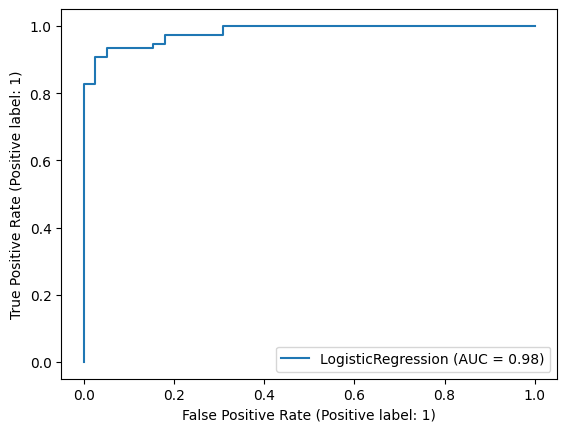


Model: LinearSVC
Confusion Matrix:
[[30  9]
 [ 0 75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        39
           1       0.89      1.00      0.94        75

    accuracy                           0.92       114
   macro avg       0.95      0.88      0.91       114
weighted avg       0.93      0.92      0.92       114

Precision Score: 0.8928571428571429
Recall Score: 1.0
F1 Score: 0.9433962264150945


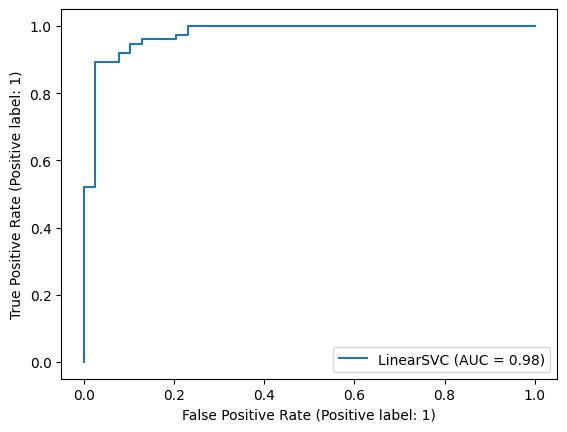


Model: KNeighborsClassifier
Confusion Matrix:
[[34  5]
 [ 4 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.93      0.95      0.94        75

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Precision Score: 0.9342105263157895
Recall Score: 0.9466666666666667
F1 Score: 0.9403973509933775


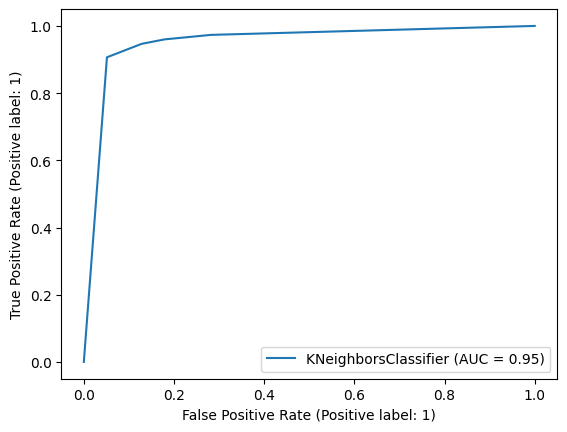


Model: RandomForestClassifier
Confusion Matrix:
[[39  0]
 [ 2 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.99        75

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Precision Score: 1.0
Recall Score: 0.9733333333333334
F1 Score: 0.9864864864864865


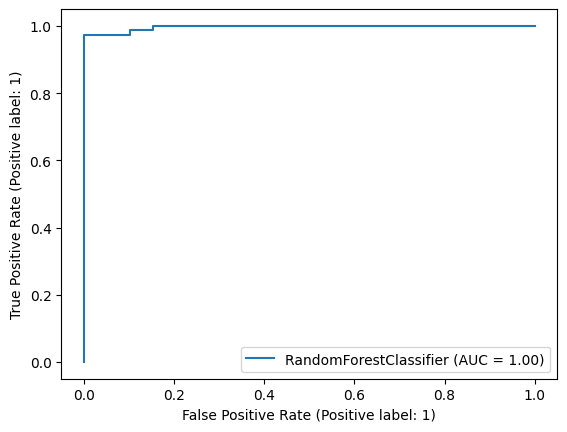

In [33]:
#import the : numpy, pandas, and matplotlib libraries
#import the dataset, models, and evaluation metrics from sklearn :
"""
Import:
Logistic Regression from the sklearn.linear_model
Linear Support Vector Machines for classification from the sklearn.svm
Kneirest neighbors classfier from sklearn neighbors
Random Forest Classifier from sklearn.ensemble
train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV from sklearn.model_selection
confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve from sklearn.metrics
load_breast_cancer from sklearn.datasets
"""
# Turn the feature data into a dataframe
# Add the target columns, and fill it with the target data
# Show the dataframe
# See the dataframe information
#Divide data into train and test sets
"""
this can be done in two steps:
step1:
Divide data into X (features) and y (target)

step2:
Divide data into test and training sets using train_test_split

"""
#Train the models imported
#Using metrics imported, show all results of trained models

#Write your code here


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
X['target'] = data.target

# Show the dataframe
print(X.head())

# See the dataframe information
print(X.info())

# Divide data into X (features) and y (target)
y = X['target']
X = X.drop('target', axis=1)

# Divide data into test and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train the models imported
models = [
    LogisticRegression(),
    LinearSVC(),
    KNeighborsClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)

# Using metrics imported, show all results of trained models
for model in models:
    y_pred = model.predict(X_test)
    print("\nModel:", type(model).__name__)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()


# 11. References

[1] https://scikit-learn.org/stable/install.html



[2] https://scikit-learn.org/stable/



[3] https://scikit-learn.org/stable/datasets/toy_dataset.html



[4] https://realpython.com/tutorials/databases/



[5] https://github.com/asavinov/machine-learning-and-data-processing



[6] http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf



[7] https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py




[8] https://scikit-learn.org/stable/modules/neighbors.html



[9] https://scikit-learn.org/stable/modules/grid_search.html




[10] https://scikit-learn.org/stable/modules/model_evaluation.html
